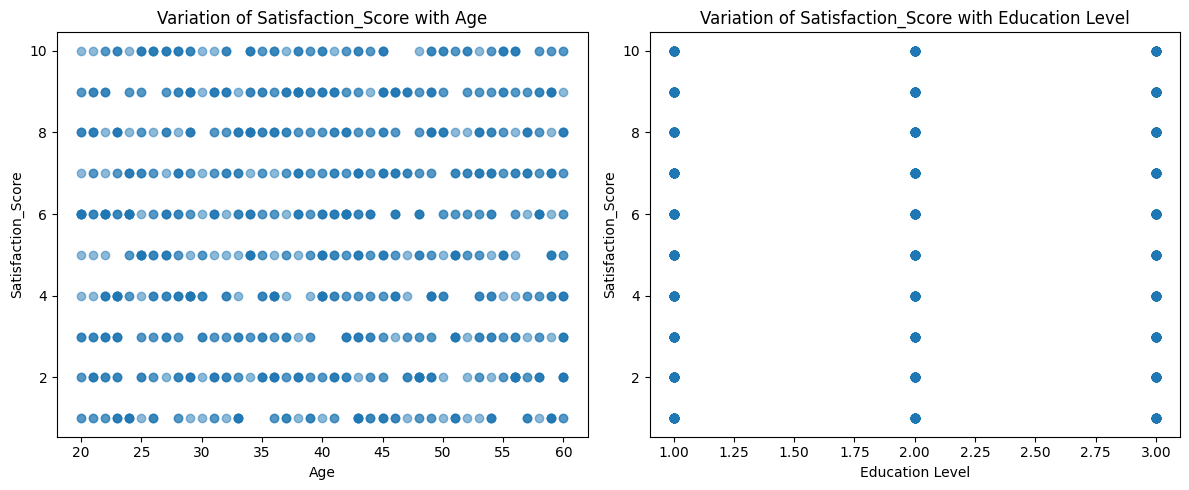

Classifier: Decision Tree
Accuracy: 0.08
Precision: 0.08496241184220724
Recall: 0.08
F1-score: 0.08068290530790531
AUC-ROC: 0.4885384063310491

Classifier: Random Forest
Accuracy: 0.17
Precision: 0.19714648104899526
Recall: 0.17
F1-score: 0.17634386200120436
AUC-ROC: 0.5470634933082328

Classifier: CART
Accuracy: 0.08
Precision: 0.08165037878787879
Recall: 0.08
F1-score: 0.07940696042308946
AUC-ROC: 0.4897176458395813

Classifier: SVM
Accuracy: 0.105
Precision: 0.012222222222222221
Recall: 0.105
F1-score: 0.0218957345971564
AUC-ROC: None

Classifier: KNN
Accuracy: 0.125
Precision: 0.11580176359588125
Recall: 0.125
F1-score: 0.11009442117022765
AUC-ROC: 0.5153755602908262

Classifier: Gaussian Naive Bayes
Accuracy: 0.12
Precision: 0.07588810641627543
Recall: 0.12
F1-score: 0.08500733137829912
AUC-ROC: 0.4850256345913276

Classifier: Multinomial Naive Bayes
Accuracy: 0.1
Precision: 0.060554356060606065
Recall: 0.1
F1-score: 0.06575662304111525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


AUC-ROC: 0.4819291856280469

Classifier: Gradient Boosting
Accuracy: 0.115
Precision: 0.11479860531218768
Recall: 0.115
F1-score: 0.11273005552089176
AUC-ROC: 0.4709103127429741

Classifier: AdaBoost
Accuracy: 0.095
Precision: 0.08662223522091943
Recall: 0.095
F1-score: 0.08549399973670703
AUC-ROC: 0.47895679928547386

Classifier: XGBoost
Accuracy: 0.13
Precision: 0.12450045826206818
Recall: 0.13
F1-score: 0.1255578562325523
AUC-ROC: 0.502266433266126

Classifier: CatBoost
Accuracy: 0.145
Precision: 0.15282967498439903
Recall: 0.145
F1-score: 0.1445803158965349
AUC-ROC: 0.5291227165813034



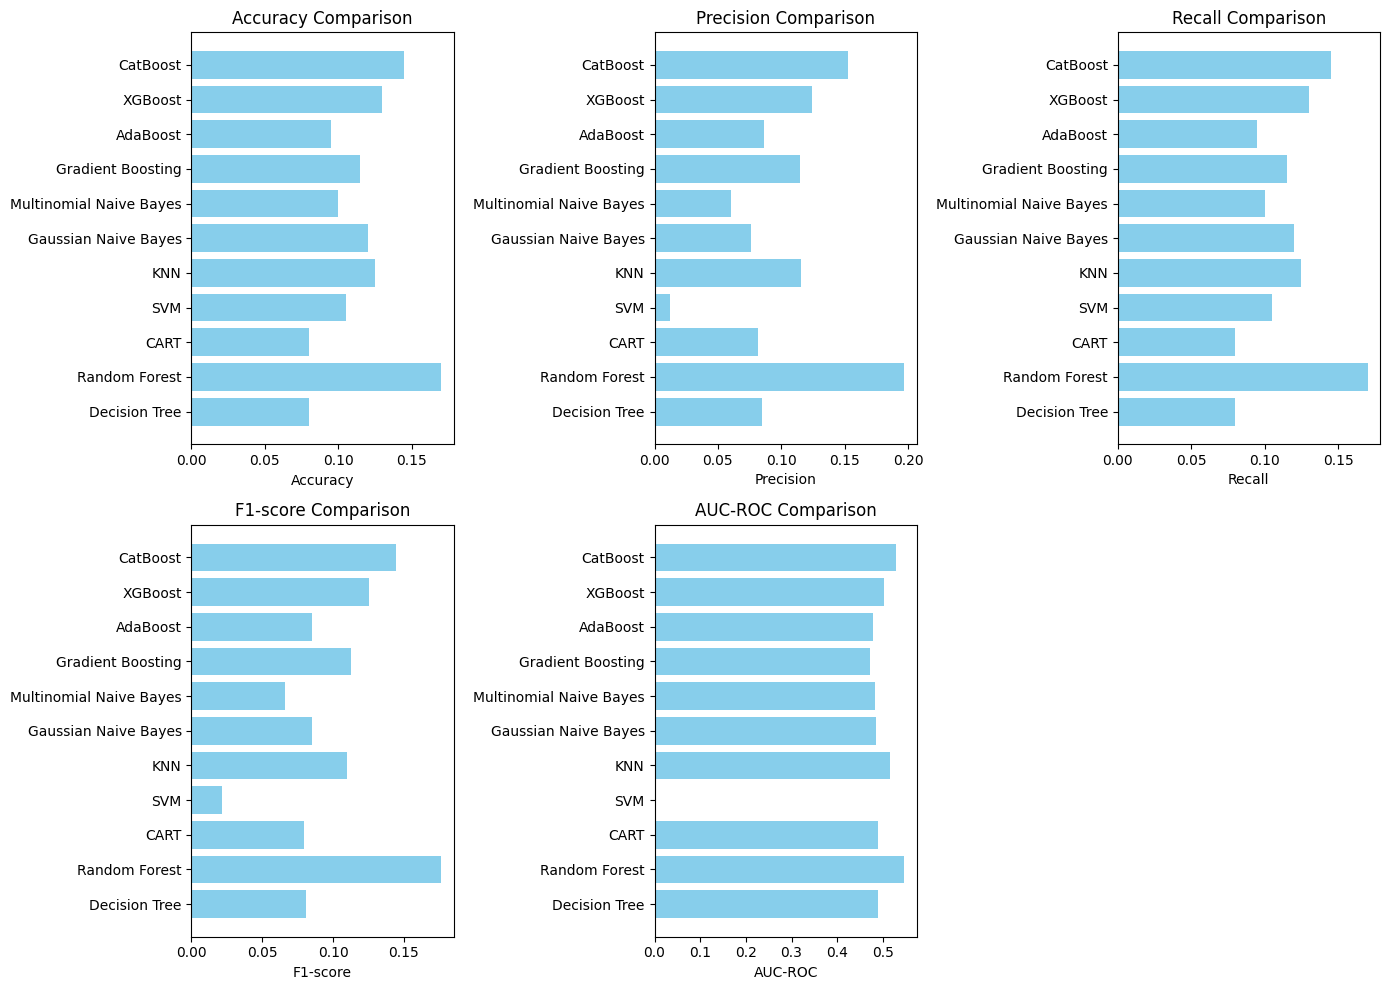

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from catboost import CatBoostClassifier
from faker import Faker  # Install faker: pip install Faker
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder





# Generating more imaginary customer data using Faker
fake = Faker()
num_samples = 1000  # Increase the number of samples

data = {
    'Age': [fake.random_int(20, 60) for _ in range(num_samples)],
    'Gender': [fake.random_element(['Male', 'Female']) for _ in range(num_samples)],
    'Education': [fake.random_element(['Graduate', 'Postgraduate', 'Undergraduate']) for _ in range(num_samples)],
    'Salary': [fake.random_int(40000, 120000) for _ in range(num_samples)],
    'Country': [fake.random_element(['USA', 'UK', 'Canada']) for _ in range(num_samples)],
    'Satisfaction_Score': [fake.random_int(1, 10) for _ in range(num_samples)]
}

# Creating a DataFrame
df = pd.DataFrame(data)

# Plotting variations between 'Satisfaction_Score' and 'Age', 'Education'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(df['Age'], df['Satisfaction_Score'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Satisfaction_Score')
plt.title('Variation of Satisfaction_Score with Age')

plt.subplot(1, 2, 2)
edu_map = {'Graduate': 3, 'Postgraduate': 2, 'Undergraduate': 1}
df['Education'] = df['Education'].map(edu_map)
plt.scatter(df['Education'], df['Satisfaction_Score'], alpha=0.5)
plt.xlabel('Education Level')
plt.ylabel('Satisfaction_Score')
plt.title('Variation of Satisfaction_Score with Education Level')

plt.tight_layout()
plt.show()

# Convert categorical variables to numerical using one-hot encoding
df = pd.get_dummies(df, columns=['Gender', 'Country'])

# Label encoding for 'Satisfaction_Score'
label_encoder = LabelEncoder()
df['Satisfaction_Score'] = label_encoder.fit_transform(df['Satisfaction_Score'])

# Splitting data into features and target variable
X = df.drop('Satisfaction_Score', axis=1)
y = df['Satisfaction_Score']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize classifiers including Decision Tree, Random Forest, CART, Gaussian Naive Bayes, and Multinomial Naive Bayes
classifiers = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'CART': DecisionTreeClassifier(),  # CART is essentially a Decision Tree
    'SVM': SVC(),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Multinomial Naive Bayes': MultinomialNB(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'XGBoost': XGBClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0),
}

# Dictionary to store metric scores for each classifier
metrics = {
    'Accuracy': {},
    'Precision': {},
    'Recall': {},
    'F1-score': {},
    'AUC-ROC': {}
}

for name, clf in classifiers.items():

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    # Calculate metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    auc_roc = None
    if hasattr(clf, "predict_proba"):
        y_prob = clf.predict_proba(X_test)
        auc_roc = roc_auc_score(y_test, y_prob, multi_class='ovr')

    # Store metric scores
    metrics['Accuracy'][name] = acc
    metrics['Precision'][name] = precision
    metrics['Recall'][name] = recall
    metrics['F1-score'][name] = f1
    metrics['AUC-ROC'][name] = auc_roc if auc_roc is not None else None

    # Print metric parameters
    print(f"Classifier: {name}")
    print(f"Accuracy: {acc}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"AUC-ROC: {auc_roc}\n")

# Plotting metrics comparison for each classifier
plt.figure(figsize=(14, 10))

for i, (metric, scores) in enumerate(metrics.items()):
    plt.subplot(2, 3, i+1)
    auc_roc_scores = [score if score is not None else 0 for score in scores.values()]  # Replace None with 0 for plotting
    plt.barh(list(scores.keys()), auc_roc_scores, color='skyblue')
    plt.xlabel(metric)
    plt.title(f'{metric} Comparison')

plt.tight_layout()
plt.show()
